# **Perceptron dan ANN**
## **28. Salma Annissa A. (2141720137) / TI-3F**

### **Praktikum 1**
#### **Langkah 1 - Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Langkah 2 - Load Data dan Visualisasi**

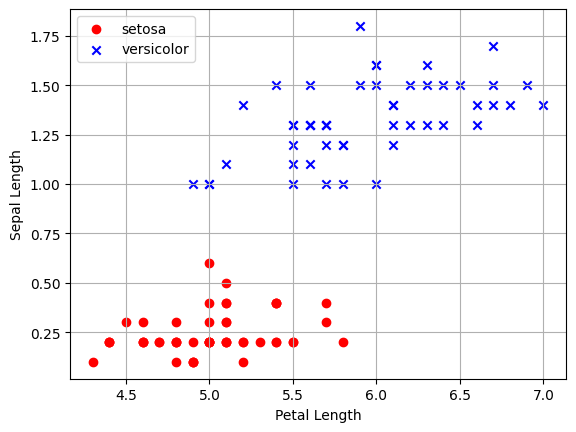

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/Dataset/iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#### **Langkah 3 - Membuat Kelas Perceptron**

In [4]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#### **Langkah 4 - Pilih Data dan Encoding Label**

In [5]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

#### **Langkah 5 - Fitting Model**

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

#### **Langkah 6 - Visualisasi Nilai Error Per Epoch**

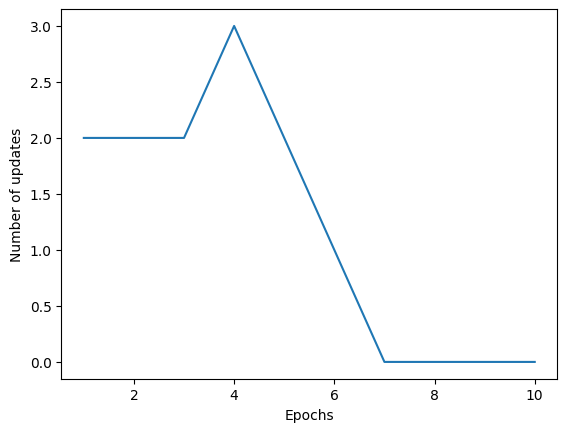

In [7]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

#### **Langkah 7 - Visualiasasi Decision Boundary**

In [8]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

### **Praktikum 2**
#### **Langkah 1 - Import Library**

In [9]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

#### **Langkah 2 - Pilih Label dan Split Data**

In [10]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

#### **Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron**

In [11]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



### **Praktikum 3**
#### **Langkah 1 - Import Library**

In [12]:
from sklearn.neural_network import MLPClassifier

#### **Langah 2 - Buat Data**

In [13]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

#### **Langkah 3 - Fit Model**

In [14]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

#### **Langkah 4 - Prediksi**

In [15]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


### **Praktikum 4**
#### **Langkah 1 - Import Library**

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf

#### **Langkah 2 - Load Data**

In [17]:
dataset = pd.read_csv('/content/drive/MyDrive/MachineLearning/Dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [18]:
print (X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


#### **Langkah 3 - Encoding Data Kategorikal**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [20]:
print (X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


#### **Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
print (X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


#### **Langkah 5 - Split Data**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### **Langkah 6 - Scaling Fitur**

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### **Membuat Model ANN**
#### **Langkah 1 - Inisiasi Model ANN**

In [25]:
ann = tf.keras.models.Sequential()

#### **Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [26]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### **Langkah 3 - Membuat Hidden Layer Kedua**

In [27]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#### **Langkah 4 - Membuat Output Layer**

In [28]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### **Training Model**
#### **Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [29]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### **Langkah 2 - Fitting Model**

In [30]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 8s 3ms/step - loss: 0.5704 - accuracy: 0.7757
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4788 - accuracy: 0.7995
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4480 - accuracy: 0.8018
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8062
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4222 - accuracy: 0.8085
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8161
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4049 - accuracy: 0.8177
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8221
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3940 - accuracy: 0.8245
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3887 - accura

### **Membuat Prediksi**
Diberikan informasi sebagai berikut, </br>
1. Geography: France
2. Credit Score: 600
3. Gender: Male
4. Age: 40 years old
5. Tenure: 3 years
6. Balance: 60000 </br>
7. Number of Products: 2
8. Does this customer have a credit card ? Yes
9. Is this customer an Active Member: Yes
10. Estimated Salary: $ 50000 </br>

Apakah customer tersebut perlu dipertahankan? </br>
Jawab :

### **Modelkan Data Baru dan Buat Prediksi**

In [31]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 159ms/step
[[False]]


Apakah hasilnya False? </br>
Jawab : Ya. Hasil dari kode program di atas merupakan FALSE

### **Prediksi Dengan Data Testing**

In [32]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### **Cek Akurasi dan Confusion Matrix**

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1527   68]
 [ 209  196]]


0.8615

### **TUGAS PRAKTIKUM**

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
- Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from subprocess import check_output
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [35]:
#import dataset
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 2s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


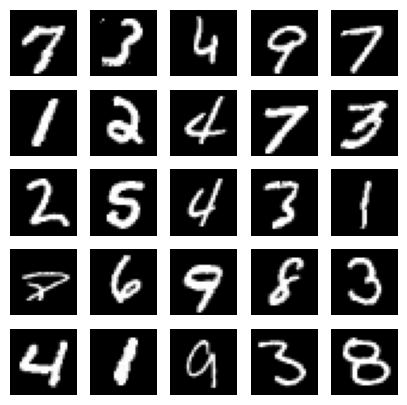

In [36]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

**DESIGN MODEL MENGGUNAKAN KERAS**

In [37]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [38]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [40]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [41]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [42]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

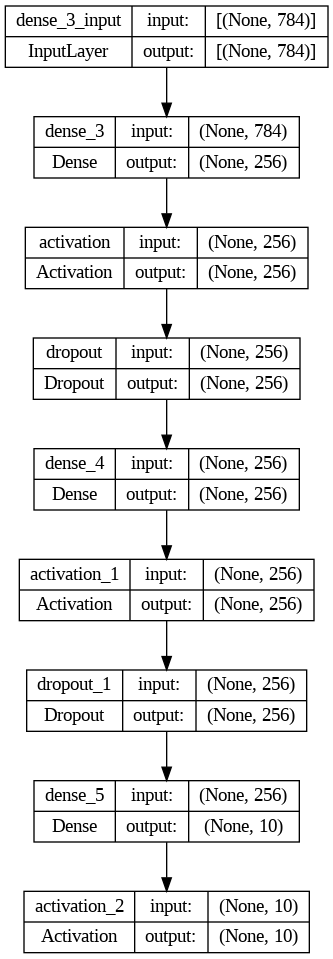

In [44]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 4s 4ms/step - loss: 0.4336 - accuracy: 0.8673
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1975 - accuracy: 0.9407
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1548 - accuracy: 0.9541
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1287 - accuracy: 0.9619
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1167 - accuracy: 0.9645
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1033 - accuracy: 0.9680
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0969 - accuracy: 0.9695
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0897 - accuracy: 0.9722
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0842 - accuracy: 0.9735
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0804 - accuracy: 0.9748

**EVALUASI PERFORMA**

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Prediksi hasil dari data pengujian
y_pred = model.predict(x_test)

# Mengonversi prediksi ke bilangan bulat
y_pred = np.argmax(y_pred, axis=1)

# Mengonversi label kelas ke bilangan bulat
y_test = np.argmax(y_test, axis=1)

# Membuat matriks kebingungan
labels = np.unique(y_test)
confusion = confusion_matrix(y_test, y_pred, labels=labels)

print("Confusion Matrix:")
print(confusion)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 972    0    1    2    0    1    2    1    1    0]
 [   0 1124    3    1    0    0    2    1    4    0]
 [   4    0 1016    5    1    0    1    4    1    0]
 [   0    0    1 1002    0    1    0    3    2    1]
 [   1    0    1    0  966    0    5    1    2    6]
 [   2    0    0    7    1  875    2    1    2    2]
 [   6    2    2    0    3    3  940    0    2    0]
 [   1    4    7    6    0    0    0 1005    0    5]
 [   2    0    2    5    2    1    1    3  954    4]
 [   1    3    0    8    8    3    0    2    1  983]]
Accuracy: 0.9837


**IMPLEMENTASI ANN MENGGUNAKAN TENSORFLOW**

**Import Library**

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')
#cuda 12.1 not recognized by tf :(
%matplotlib inline
# print(tensorflow.__version__)

**Menyiapkan Data MNIST dan Melakukan Splitting**

In [49]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

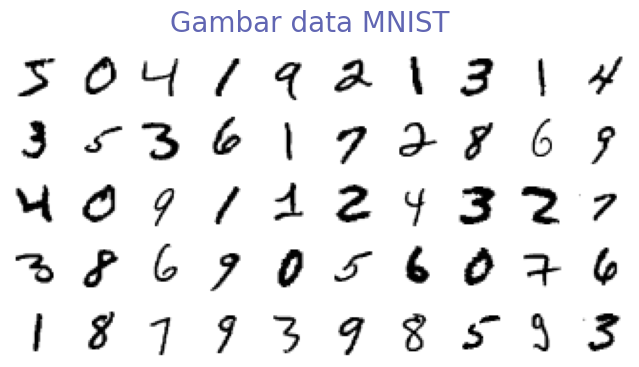

In [50]:
# Menampilkan gambar dari data MNIST

fig, ax = plt.subplots(nrows = 5, ncols = 10, figsize=(8,4), subplot_kw={'xticks': [], 'yticks': []})
for row in range(0,5):
    for col in range(0,10):
        myid = (10*row) + col # (ncols*rows) + cols

        ax[row,col].imshow( x_train[myid], cmap=plt.cm.binary ) # W,H,C
        ax[row,col].axis('off')

plt.suptitle("Gambar data MNIST", size=20, color="#6166B3")

plt.show()

**Menampilkan informasi dataset MNIST**

In [51]:
print("bentuk data: ",x_train.shape)
print("nilai max data: ",x_train[0].max())

bentuk data:  (60000, 28, 28)
nilai max data:  255


**Reshape dan Normalisasi Data**

In [52]:
# ubah bentuk data dan skala pixel menjadi (n,w*h)
x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
# sama juga untuk x_test
x_test = x_test.reshape(-1, 28*28)
x_test = x_test.astype('float32') / 255

print("bentuk data setelah: ",x_train.shape)
print("nilai max data setelah: ",x_train[0].max())

bentuk data setelah:  (60000, 784)
nilai max data setelah:  1.0


**Membuat Pemodelan ANN**

In [53]:
# ubah bentuk label menjadi kategorical untuk digunakan tensorflow nantinya
y_train = tensorflow.keras.utils.to_categorical(y_train , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

In [54]:
# pembuatan hidden layer
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Input,Add,MaxPool2D,Flatten,AveragePooling2D,Dense,BatchNormalization,ZeroPadding2D,Activation,Concatenate,UpSampling2D
from tensorflow.keras.models import Model

nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(10, activation='softmax'))
print(nn_model)

In [55]:
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Melakukan Pelatihan dan Pengujian Dataset**

In [56]:
history = nn_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5077 - accuracy: 0.8496
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3165 - accuracy: 0.9064
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2731 - accuracy: 0.9199
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2494 - accuracy: 0.9249
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2381 - accuracy: 0.9273
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2281 - accuracy: 0.9303
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2183 - accuracy: 0.9329
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2096 - accuracy: 0.9354
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2050 - accuracy: 0.9367
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.20

**Membuat Visualisasi dan Evaluasi**

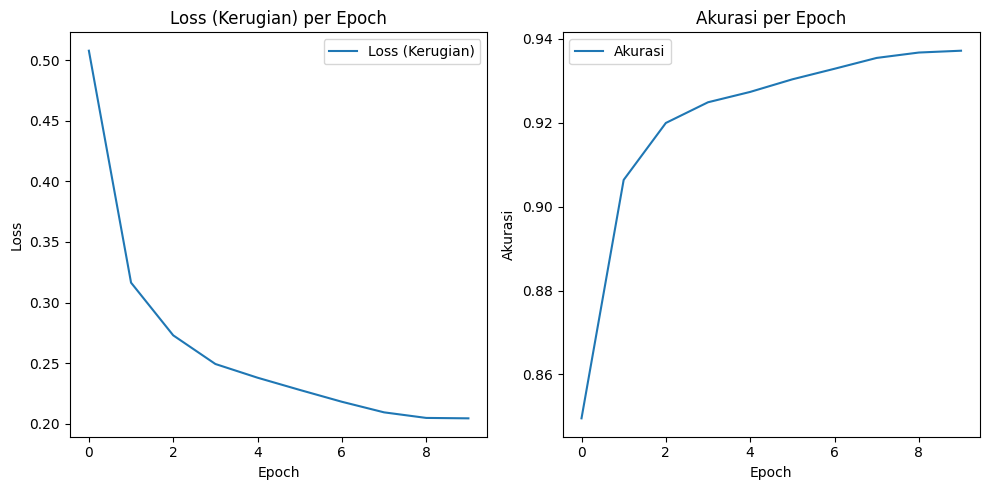

In [57]:
# Visualisasi loss (kerugian)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (Kerugian)')
plt.title('Loss (Kerugian) per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Visualisasi akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Akurasi')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

**Membuat Confusion Matriks**

In [58]:
# Menghitung akurasi model pada data pengujian menggunakan prediksi yang dihasilkan sebelumnya
y_prob = nn_model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test = np.argmax(y_test, axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

313/313 [==============================] - 2s 5ms/step


0.9608

In [59]:
# Menghitung confusion matrix berdasarkan label sebenarnya (y_test) dan label prediksi (y_pred)
from sklearn.metrics import confusion_matrix  # for evaluating results
confusion_array = confusion_matrix(y_true = y_test,y_pred = y_pred)
confusion_array

array([[ 970,    0,    1,    0,    1,    2,    2,    1,    3,    0],
       [   0, 1120,    4,    3,    0,    0,    2,    1,    5,    0],
       [   4,    2,  986,    8,    8,    2,    4,    6,   11,    1],
       [   2,    0,    9,  968,    1,   17,    0,    7,    6,    0],
       [   0,    2,    3,    0,  938,    0,    8,    2,    2,   27],
       [   7,    1,    1,   14,    3,  854,    5,    1,    3,    3],
       [   9,    3,    1,    0,    6,    7,  926,    0,    6,    0],
       [   1,    7,   13,    8,    3,    0,    0,  986,    0,   10],
       [  10,    7,    2,    9,    4,   10,    6,    8,  917,    1],
       [   3,    8,    0,   16,   16,   12,    1,    8,    2,  943]])

<Axes: >

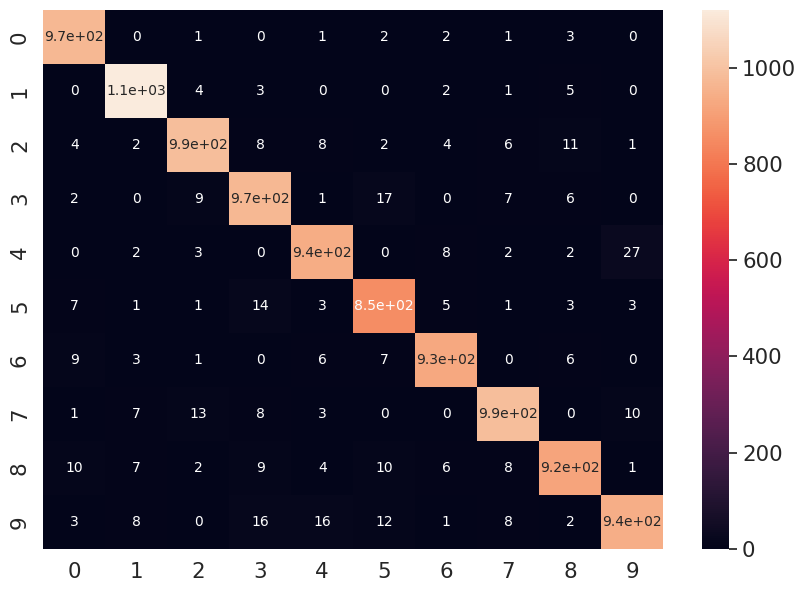

In [60]:
# Membuat visualisasi Confusion Matrix
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion_array, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size